In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from open4dense import give_me_orig_ecco
import xarray as xr
import os 
import ecco_v4_py as e4p

int_arg = 0

filedb_lst = []
for i in range(1,13):
    for j in range(1,4):
        filedb_lst.append(f'/sciserver/filedb{i:02}-0{j}')

save_path = filedb_lst[9+int_arg]+'/ocean/wenrui_temp/particle_file/NEP/nc_backward_seas/'
path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'

ds = give_me_orig_ecco()
ds['utrans'] = (ds['u_gm']+ds['UVELMASS'])*ds.dyG*ds.drF
ds['vtrans'] = (ds['v_gm']+ds['VVELMASS'])*ds.dxG*ds.drF
ds['wtrans'] = (ds['w_gm']+ds['WVELMASS'])*ds.rA
# ds['u'] = (ds['u_gm']+ds['UVELMASS'])
# ds['v'] = (ds['v_gm']+ds['VVELMASS'])
# ds['w'] = (ds['w_gm']+ds['WVELMASS'])
tseas1 = xr.open_zarr(path+'tseas1.zarr')
tseas2 = xr.open_zarr(path+'tseas2.zarr')
tseas3 = xr.open_zarr(path+'tseas3.zarr')
tseas = xr.concat([tseas1,tseas2,tseas3],dim = 'dayofyear')
ta = (ds.THETA.groupby('time.dayofyear') - tseas).transpose('time','Z','face','Y','X').THETA

from cmocean.cm import balance
import cartopy.crs as ccrs
import cartopy.feature as cfeature
projection = ccrs.Mercator(central_longitude=190.0, min_latitude=-80.0, max_latitude=84.0, latitude_true_scale=45.0)
from open4dense import give_me_ecco_heat_seas

wallt_path = '/sciserver/filedb09-01/ocean/wall_theta.zarr'
data_path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'
ds1 = give_me_ecco_heat_seas(data_path,wallt_path,time_mean_vel = False)

xg = np.load('../../james_plot/plotting_xg.npy')
yg = np.load('../../james_plot/plotting_yg.npy')

ds = xr.merge([ds,ds1])
ds

/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]
/home/wjiang33/miniconda3/envs/bubblebath/lib/python3.12/site-packages/xarray/core/indexing.py:1446: PerformanceWarning: Slicing with an

<xarray.Dataset>
Dimensions:     (time: 9497, Zl: 50, face: 13, Y: 90, X: 90, Z: 50, Xp1: 90,
                 Yp1: 90, time_midp: 9496, dayofyear: 366)
Coordinates: (12/33)
    XC          (face, Y, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    XG          (face, Yp1, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    YC          (face, Y, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    YG          (face, Yp1, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-01T18:00:00 ... 2017-12-31T06:0...
  * time_midp   (time_midp) datetime64[ns] 1992-01-02 1992-01-03 ... 2017-12-31
    ...          ...
    maskW       (Z, face, Y, Xp1) int8 dask.array<chunksize=(25, 7, 45, 45), meta=np.ndarray>
    rA          (face, Y, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    rAs         (face, Yp1, X) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    rAw         (face, Y, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
    rAz         (face, Yp1, Xp1) float32 dask.array<chunksize=(7, 90, 90), meta=np.ndarray>
  * dayofyear   (dayofyear) int64 1 2 3 4 5 6 7 ... 360 361 362 363 364 365 366
Data variables: (12/68)
    ADVr_SLT    (time, Zl, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH     (time, Zl, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT    (time, Z, face, Y, Xp1) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH     (time, Z, face, Y, Xp1) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT    (time, Z, face, Yp1, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH     (time, Z, face, Yp1, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...          ...
    I           (time, Z, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    lhs         (time, Z, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    txprime     (time, Z, face, Y, Xp1) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    typrime     (time, Z, face, Yp1, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    tzprime     (time, Zl, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    divuty      (time, Z, face, Y, X) float64 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/62)
    Conventions:                     CF-1.8, ACDD-1.3
    acknowledgement:                 This research was carried out by the Jet...
    author:                          Ian Fenty and Ou Wang
    cdm_data_type:                   Grid
    comment:                         Fields provided on the curvilinear lat-l...
    coordinates_comment:             Note: the global 'coordinates' attribute...
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               1992-01-02T00:00:00
    time_coverage_resolution:        P1D
    time_coverage_start:             1992-01-01T12:00:00
    title:                           ECCO Ocean Temperature and Salinity - Da...
    uuid:                            c2efe382-4168-11eb-8956-0cc47a3f480f

In [2]:
import cmocean

In [86]:
str(ds.time[8126].data),str(ds.time[8857].data)

('2014-04-01T12:00:00.000000000', '2016-04-01T12:00:00.000000000')

In [ ]:
ds['u1415'] = (ds['u_gm']+ds['UVELMASS']).isel(time = slice(8126,8857)).mean(dim = 'time').persist()
print('u finish')
ds['v1415'] = (ds['v_gm']+ds['VVELMASS']).isel(time = slice(8126,8857)).mean(dim = 'time').persist()
print('v finish')
ds['w1415'] = (ds['w_gm']+ds['WVELMASS']).isel(time = slice(8126,8857)).mean(dim = 'time').persist()
print('w finish')
ds['t1415'] = ds.THETA.isel(time = slice(8126,8857)).mean(dim = 'time').persist()
print('t finish')

In [4]:
path = '/sciserver/filedb02-02/ocean/wenrui_temp/heat/'
um = xr.open_zarr(path+'utrans_m.zarr')
tm = xr.open_zarr(path+'tmean.zarr')

ds['u_mean'] = um['utrans_m']/ds.dyG/ds.drF
ds['v_mean'] = um['vtrans_m']/ds.dxG/ds.drF
ds['w_mean'] = um['wtrans_m']/ds.rA
ds['tmean'] = tm['tmean']

In [5]:
import seaduck as sd

In [6]:
tub = sd.OceData(ds)

In [7]:
projection = ccrs.Mercator(central_longitude=190.0, min_latitude=-80.0, max_latitude=84.0, latitude_true_scale=45.0)

In [8]:
uknw = sd.lagrangian.uknw
vknw = sd.lagrangian.vknw
wknw = sd.lagrangian.wknw
wkernel = np.array([[0, 0]])
tknw = sd.KnW(vkernel = 'linear')

In [9]:
from geopy.distance import geodesic

def calculate_projected_rectangle(lon1, lat1, lon2, lat2, perpendicular_distance, projection=ccrs.PlateCarree()):
    """
    Compute the four corners of a rectangle in a projected coordinate system.

    Parameters:
    lon1, lat1 : float : Longitude and Latitude of first point
    lon2, lat2 : float : Longitude and Latitude of second (adjacent) point
    perpendicular_distance : float : Distance along the perpendicular edge in projected space (km)
    projection : cartopy.crs : The map projection to use (default: PlateCarree)

    Returns:
    list : Four corner points [(lonA, latA), (lonB, latB), (lonC, latC), (lonD, latD)]
    """

    # Convert lat/lon to projected coordinates (meters)
    x1, y1 = projection.transform_point(lon1, lat1, ccrs.Geodetic())
    x2, y2 = projection.transform_point(lon2, lat2, ccrs.Geodetic())

    lat_test = lat1 + 1 / 111  # ~1 km in latitude
    x_test, y_test = projection.transform_point(lon1, lat_test, ccrs.Geodetic())
    
    # Compute how many projected units correspond to 1 km in this location
    meters_per_unit = np.hypot(x_test - x1, y_test - y1)

    # Convert perpendicular distance from km to projected coordinates
    perpendicular_distance_proj = perpendicular_distance * meters_per_unit

    # Compute direction vector along the given edge
    dx, dy = x2 - x1, y2 - y1

    # Compute perpendicular vector (-dy, dx) normalized
    length = np.hypot(dx, dy)
    for _ in range(7):
        perp_dx = (-dy / length) * perpendicular_distance_proj
        perp_dy = (dx / length) * perpendicular_distance_proj
    
        # Compute the four corners
        x3, y3 = x2 + perp_dx, y2 + perp_dy
        x4, y4 = x1 + perp_dx, y1 + perp_dy
    
        # Convert back to latitude/longitude
        normal_proj = ccrs.PlateCarree()
        lon3, lat3 = normal_proj.transform_point(x3, y3, projection)
        lon4, lat4 = normal_proj.transform_point(x4, y4, projection)
        
        actual_distance_km = geodesic((lat2, lon2), (lat3, lon3)).km
        adjustment_factor = abs(perpendicular_distance) / actual_distance_km if actual_distance_km > 0 else 1
        perpendicular_distance_proj *= adjustment_factor
        error = abs(actual_distance_km) - abs(perpendicular_distance)

        # perpendicular_distance_proj -= error*meters_per_unit
        print(f"Iteration: {_+1}, Target Distance: {perpendicular_distance:.4f} km, "
              f"Actual Distance: {actual_distance_km:.4f} km, Error: {error:.4f} km")

    return np.array([(lon1, lat1), (lon2, lat2), (lon3, lat3), (lon4, lat4)])

In [10]:
def calculate_angle(lon1, lat1, lon2, lat2, projection=ccrs.PlateCarree()):
    x1, y1 = projection.transform_point(lon1, lat1, ccrs.Geodetic())
    x2, y2 = projection.transform_point(lon2, lat2, ccrs.Geodetic())
    dx, dy = x2 - x1, y2 - y1

    # Compute perpendicular vector (-dy, dx) normalized
    length = np.hypot(dx, dy)
    return dy/length, dx/length

In [11]:
def generate_grid(rectangle_corners, nx, ny, projection=ccrs.AzimuthalEquidistant()):
    """
    Generate an nx × ny grid of latitude and longitude points inside the given rectangle.

    Parameters:
    rectangle_corners : list : Four corner points [(lonA, latA), (lonB, latB), (lonC, latC), (lonD, latD)]
    nx, ny : int : Number of points along x (width) and y (height)
    projection : cartopy.crs : The projection used for coordinate transformation

    Returns:
    np.ndarray : Two 2D arrays (lon_grid, lat_grid) of shape (ny, nx)
    """

    (lonA, latA), (lonB, latB), (lonC, latC), (lonD, latD) = rectangle_corners
    
    # Convert corners to projected coordinates
    xA, yA = projection.transform_point(lonA, latA, ccrs.Geodetic())
    xB, yB = projection.transform_point(lonB, latB, ccrs.Geodetic())
    xC, yC = projection.transform_point(lonC, latC, ccrs.Geodetic())
    xD, yD = projection.transform_point(lonD, latD, ccrs.Geodetic())
    
    # Create evenly spaced grid in projected coordinates
    xAB = np.linspace(xA, xB, nx)
    yAB = np.linspace(yA, yB, nx)
    xAD = np.linspace(xA, xD, ny)
    yAD = np.linspace(yA, yD, ny)# Interpolate along height
    
    # Create 2D meshgrid
    x,y = np.zeros((ny,nx)),np.zeros((ny,nx))
    for j in range(ny):
        x[j] = xAB - xAB[0] + xAD[j]
        y[j] = yAB - yAB[0] + yAD[j]
    
    lon_grid, lat_grid = np.vectorize(lambda x, y: ccrs.PlateCarree().transform_point(x, y, projection))(x, y)

    return lon_grid, lat_grid

In [29]:
ny,nx = 45,30
lon1, lat1 = -120, 39.5  # Example point
lon2, lat2 = -102.5, 22.5  # Another point (slightly east)
perpendicular_distance = -2100  # 10 km perpendicular edge

rectangle_corners = calculate_projected_rectangle(lon1, lat1, lon2, lat2, perpendicular_distance,projection = projection)
lon_outer, lat_outer=generate_grid(rectangle_corners, nx, ny, projection=projection)

lon_grid = 0.5 * (lon_outer[:-1, :-1] + lon_outer[1:, 1:])
lat_grid = 0.5 * (lat_outer[:-1, :-1] + lat_outer[1:, 1:])

Iteration: 1, Target Distance: -2100.0000 km, Actual Distance: 2620.5328 km, Error: 520.5328 km
Iteration: 2, Target Distance: -2100.0000 km, Actual Distance: 2086.6757 km, Error: -13.3243 km
Iteration: 3, Target Distance: -2100.0000 km, Actual Distance: 2100.3707 km, Error: 0.3707 km
Iteration: 4, Target Distance: -2100.0000 km, Actual Distance: 2099.9897 km, Error: -0.0103 km
Iteration: 5, Target Distance: -2100.0000 km, Actual Distance: 2100.0003 km, Error: 0.0003 km
Iteration: 6, Target Distance: -2100.0000 km, Actual Distance: 2100.0000 km, Error: -0.0000 km
Iteration: 7, Target Distance: -2100.0000 km, Actual Distance: 2100.0000 km, Error: 0.0000 km


In [30]:
rectangle_corners

array([[-120.        ,   39.5       ],
       [-102.5       ,   22.5       ],
       [-117.27549851,    9.95239694],
       [-134.77549851,   28.70136604]])

In [31]:
bottom_lon = lon_outer[:,-1]
bottom_lat = lat_outer[:,-1]
dist = []
for i in range(len(bottom_lon)):
    ddd = geodesic((bottom_lat[i],bottom_lon[i]),(lat2,lon2)).km
    dist.append(ddd)
dist = np.array(dist)

In [32]:
dx = np.diff(dist)

In [33]:
ydist = geodesic((lat1,lon1),(lat2,lon2)).km

In [80]:
z = -0.001-np.arange(105)*2
_,x = np.meshgrid(z,lon_grid.ravel())
z,y = np.meshgrid(z,lat_grid.ravel())
x = x.ravel()
y = y.ravel()
z = z.ravel()

In [81]:
tub.dZ = abs(tub.dZ)

In [82]:
pt = sd.Particle(x = x,y = y,z = z,t = tub.ts[100]+1,data = tub)

/home/wjiang33/pkg_dvlp/seaduck/seaduck/utils.py:558: RuntimeWarning: invalid value encountered in divide
  ry[order2] = ((-bb + np.sqrt(det2)) / (2 * aa))[order2]
/home/wjiang33/pkg_dvlp/seaduck/seaduck/utils.py:564: RuntimeWarning: divide by zero encountered in divide
  rx[~rot_rectilinear] = ((x - a[0] - a[2] * ry) / (a[1] + a[3] * ry))[
/home/wjiang33/pkg_dvlp/seaduck/seaduck/utils.py:564: RuntimeWarning: invalid value encountered in divide
  rx[~rot_rectilinear] = ((x - a[0] - a[2] * ry) / (a[1] + a[3] * ry))[


In [83]:
wm,w1,(um,uv),(u1,v1),tm,t1 = pt.interpolate(['w_mean','w1415',('u_mean','v_mean'),('u1415','v1415'),'tmean','t1415'],
                            [wknw,wknw,(uknw,vknw),(uknw,vknw),tknw,tknw])

In [91]:
shape = (ny-1,nx-1,105)

In [92]:
u_rot, v_rot = projection.transform_vectors(ccrs.PlateCarree(), lon_grid, lat_grid, u1.reshape(ny-1,nx-1,105)[...,0], v1.reshape(ny-1,nx-1,105)[...,0])

In [93]:
neg_cos,sin = calculate_angle(lon1, lat1, lon2, lat2,projection = projection)
cos = -neg_cos

In [94]:
u_perp = u_rot*cos+v_rot*sin
v_perp = -u_rot*sin+v_rot*cos

/tmp/ipykernel_3271244/2350453044.py:11: RuntimeWarning: Mean of empty slice
  tt = ax.contour(-(dist[1:]+dist[:-1])*0.5,-np.arange(105)*2,np.nanmean(t.reshape(shape),axis = 1).T,levels = 15,


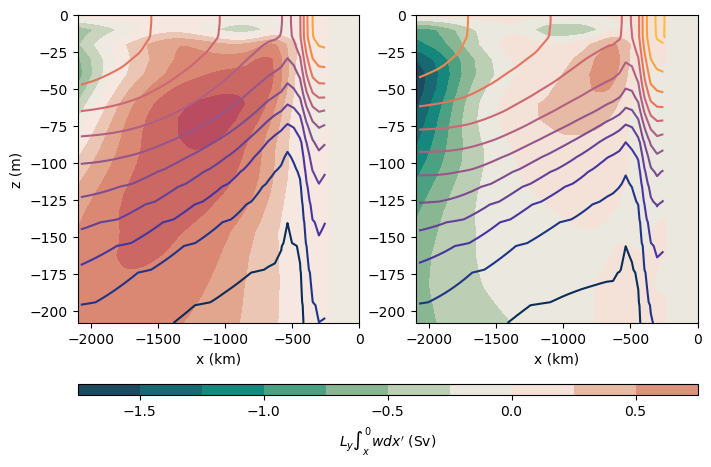

In [95]:
vmax = 2.
fig,axs = plt.subplots(1,2,figsize = (8,4))
ws = [wm,w1]
ts = [tm,t1]
for i,ax in enumerate(axs):
    w = ws[i]
    t = ts[i]
    stream = np.zeros((105,ny))
    stream[:,1:] = (w.reshape(shape).mean(axis = 1).T*dx).cumsum(axis = 1)*ydist
    ct = ax.contourf(-dist,-np.arange(105)*2,stream,vmax = vmax,vmin = -vmax,cmap = cmocean.cm.curl,levels = 10)
    tt = ax.contour(-(dist[1:]+dist[:-1])*0.5,-np.arange(105)*2,np.nanmean(t.reshape(shape),axis = 1).T,levels = 15,
                    cmap = cmocean.cm.thermal,vmin = 9,vmax = 30)
    ax.set_xlabel('x (km)')
    if i == 0:
        ax.set_ylabel('z (m)')
dummy_ax = plt.subplot(1,1,1)
dummy_ax.axis('off')
plt.colorbar(ct,orientation = 'horizontal',ax = dummy_ax,aspect = 60,extend = 'both', label = r"$L_y\int_x^0 w dx'$ (Sv)",anchor = (0.5,-2))
# plt.colorbar(tt)
# plt.tight_layout()

In [96]:
np.savetxt("CC_box_lon.csv", lon_outer, delimiter=",")
np.savetxt("CC_box_lat.csv", lat_outer, delimiter=",")

In [97]:
np.save('cc_dist.npy',dist)

In [99]:
vmax = 2.
# fig,axs = plt.subplots(1,2,figsize = (8,4))
ws = [wm,w1]
ts = [tm,t1]
which = ['mean','anom']
for i,ax in enumerate(axs):
    w = ws[i]
    t = ts[i]
    stream = np.zeros((105,ny))
    stream[:,1:] = (w.reshape(shape).mean(axis = 1).T*dx).cumsum(axis = 1)*ydist
    tt = np.nanmean(t.reshape(shape),axis = 1).T
    np.save('cc_stream_'+which[i]+'.npy',stream)
    np.save('cc_theta_'+which[i]+'.npy',tt)
# plt.colorbar(tt)
# plt.tight_layout()

/tmp/ipykernel_3271244/3689163060.py:11: RuntimeWarning: Mean of empty slice
  tt = np.nanmean(t.reshape(shape),axis = 1).T


In [100]:
mask = np.isnan(t.reshape(shape)).sum(axis = 1).T

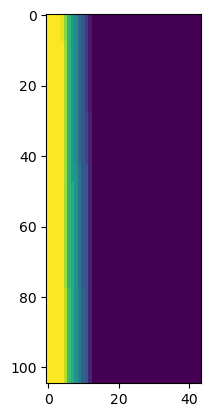

In [101]:
plt.imshow(mask)

In [102]:
np.save('cc_landmask.npy',mask)